In [1]:
# 100 days machine learning 
#online machine learning day5


In [4]:
import numpy as np
from sklearn import linear_model
n_samples , n_features = 1,50 

In [5]:
y = np.random.randn(n_samples)
x = np.random.randn(n_samples, n_features)

clf = linear_model.SGDRegressor()

import time

start_time = time.time()

clf.partial_fit(x, y)

elapsed_time = time.time() - start_time

print(elapsed_time)

0.08368825912475586


#Days 13
#End to End toy project 

In [6]:
import numpy as np 
import pandas as pd 
df = pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
#preprocess
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
#steps
'''
0.preprocess+EDA+feature selection
1.Extract input and output col
2.scale the values
3.Train test split 
4.Evaluate the model 
5.Deploy the model
'''

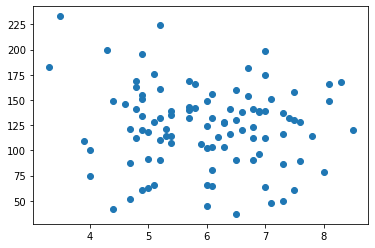

In [9]:
#EDA
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"],df["iq"])


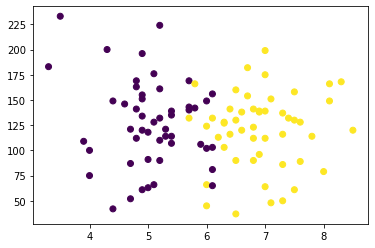

In [10]:
plt.scatter(df["cgpa"],df["iq"],c = df["placement"])#yellow placed 

In [11]:
x = df.iloc[:,0:2]# all rows 0to2 column
y = df.iloc[:,-1]

In [12]:
x.shape

(100, 2)

In [13]:
y.shape

(100,)

In [14]:
#train test split 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.1)

In [15]:
x_train

,cgpa,iq
20,6.6,120.0
66,6.9,96.0
45,6.0,66.0
7,5.0,63.0
15,5.1,176.0
...,...,...
80,4.9,196.0
56,6.1,65.0
75,4.8,169.0
87,5.7,132.0


In [16]:
y_train

20    1
66    1
45    1
7     0
15    0
     ..
80    0
56    0
75    0
87    1
13    1
Name: placement, Length: 90, dtype: int64

In [17]:
#scale the datset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)

In [19]:
x_train

array([[ 0.55487412, -0.08366642],
       [ 0.82050535, -0.69214945],
       [ 0.02361166, -1.45275324],
       [-0.86182577, -1.52881361],
       [-0.77328202,  1.33612732],
       [ 0.55487412,  0.37269586],
       [ 0.02361166,  0.65158391],
       [-0.95036951, -1.57952053],
       [ 0.90904909, -1.50346015],
       [-1.03891325, -0.28649409],
       [-0.50765079, -0.23578717],
       [ 1.79448652, -1.12315826],
       [ 0.28924289,  0.11916126],
       [ 1.17468032,  0.3473424 ],
       [ 0.46633038,  0.16986818],
       [ 0.37778664,  0.44875623],
       [ 0.11215541,  0.82905813],
       [ 0.46633038,  0.93047197],
       [-0.50765079, -0.41326139],
       [ 2.06011775,  1.13329964],
       [ 0.02361166, -0.54002869],
       [ 0.73196161, -0.00760604],
       [-0.59619454, -0.23578717],
       [-0.68473828, -0.8442702 ],
       [-0.77328202, -1.45275324],
       [ 1.44031155, -0.86962366],
       [-1.12745699, -1.80770167],
       [-1.39308822,  0.65158391],
       [-1.03891325,

In [20]:
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.79152926, -1.84726509],
       [-0.29161604,  0.37607574],
       [-0.79152926,  0.13955012],
       [ 0.1249783 ,  0.02128731],
       [-1.54139909,  1.74792433],
       [ 1.37476135, -0.286196  ],
       [ 1.12480474,  0.75451673],
       [ 1.12480474, -1.53978179],
       [-0.87484813,  0.04493987],
       [-1.04148587,  0.58894879]])

In [21]:
#Train the model using logistic regression 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [22]:
#model train
clf.fit(x_train, y_train)

LogisticRegression()

In [23]:
#.Evaluate the model 
y_pred = clf.predict(x_test)

In [24]:
y_test

5     1
4     0
19    0
70    1
95    0
55    1
91    1
44    1
86    0
89    0
Name: placement, dtype: int64

In [25]:
#found accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

<AxesSubplot:>

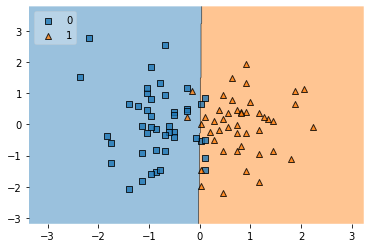

In [26]:
#visualized data
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf = clf ,legend = 2)

In [27]:
#deployment
#import pickle
#picle.dump(clf,open("model.pkl",'wb'))
#this folder pick and create site to show your prediction use 
#several platform eg google cloud,heroku,